In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



#  loading data

In [3]:
hulu=pd.read_csv('hulu_titles.csv')

# first 5 values

In [4]:
hulu.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


# Last 5 Value

In [5]:
hulu.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...
3072,s3073,TV Show,Tokyo Magnitude 8.0,NaN,NaN,Japan,NaN,2009,TV-14,1 Season,"Anime, Drama, International",The devastation is unleashed in the span of se...


# Describe The Data

In [6]:
hulu.describe()

,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


#  Information About The Data

In [7]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


# Shape of The Data

In [8]:
hulu.shape

(3073, 12)

# Name of the Column

In [9]:
hulu.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Checking the Null values

In [10]:
hulu.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

# Director has 0 Null Values ,Cast 0 Null values , Country 0 Null values, Ratings 0 Null values , Date Added 0 null values ..

# Check Unique Values

In [11]:
hulu.nunique()

show_id         3073
type               2
title           3073
director           3
cast               0
country          150
date_added      1115
release_year      72
rating            88
duration         135
listed_in        442
description     3057
dtype: int64

# Check Duplicated Values

In [12]:
hulu.duplicated().sum()

0

# Make a copy of Dataset

In [13]:
df = hulu.copy()

In [14]:
df.shape

(3073, 12)

# Drop null values

# Print first 10 values

In [15]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
5,s6,TV Show,The Halloween Candy Magic Pet,NaN,NaN,NaN,"October 22, 2021",2021,NaN,1 Season,"Family, Kids",Join Mila and Morphle on a mystery-filled Hall...
6,s7,Movie,The Evil Next Door,NaN,NaN,NaN,"October 21, 2021",2020,NaN,88 min,"Horror, Thriller","New to her role as a stepmom, a young woman mo..."
7,s8,TV Show,The Next Thing You Eat,NaN,NaN,NaN,"October 21, 2021",2021,NaN,1 Season,"Cooking & Food, Documentaries, Lifestyle & Cul...",With the unique insights and experience of Ugl...
8,s9,TV Show,Queens,NaN,NaN,NaN,"October 20, 2021",2021,TV-14,1 Season,"Drama, Music",Four women in their 40s reunite for a chance t...
9,s10,TV Show,The Bachelorette,NaN,NaN,United States,"October 20, 2021",2003,TV-14,3 Seasons,"Reality, Romance",ABC's romance reality show lets one lucky lady...


# Convert Date Time format

# Data Visualization

# Type: Movie and TV Shows

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type')

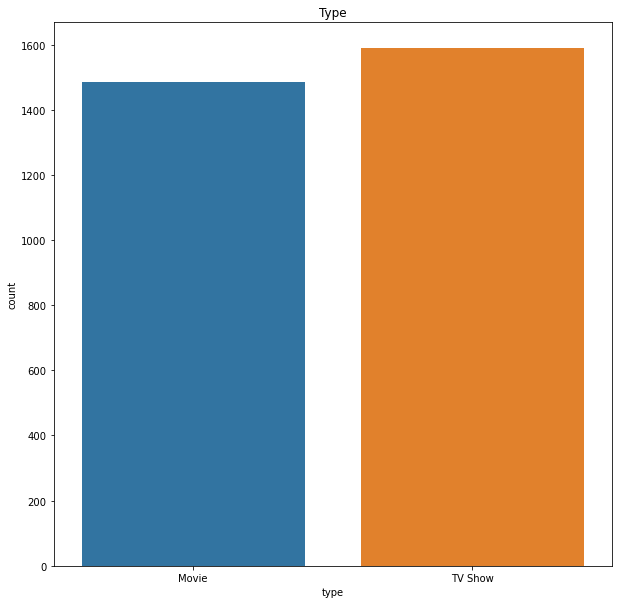

In [17]:
sns.countplot(hulu['type'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

# Rating of shows and movies

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

Text(0.5, 1.0, 'Rating')

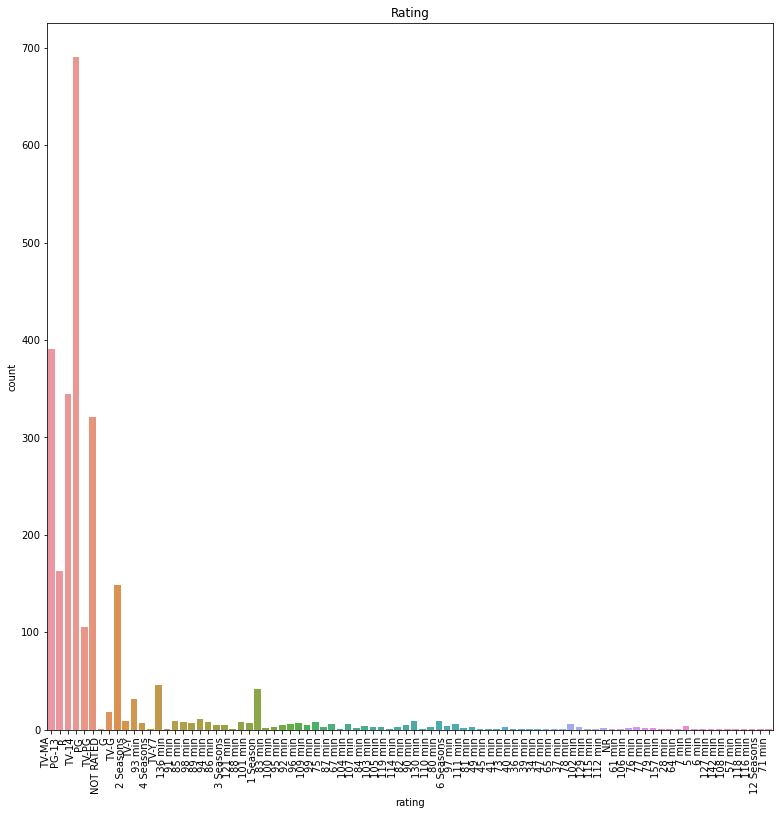

In [18]:
sns.countplot(hulu['rating'])
sns.countplot(hulu['rating']).set_xticklabels(sns.countplot(hulu['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

# Relation Between Type and Rating

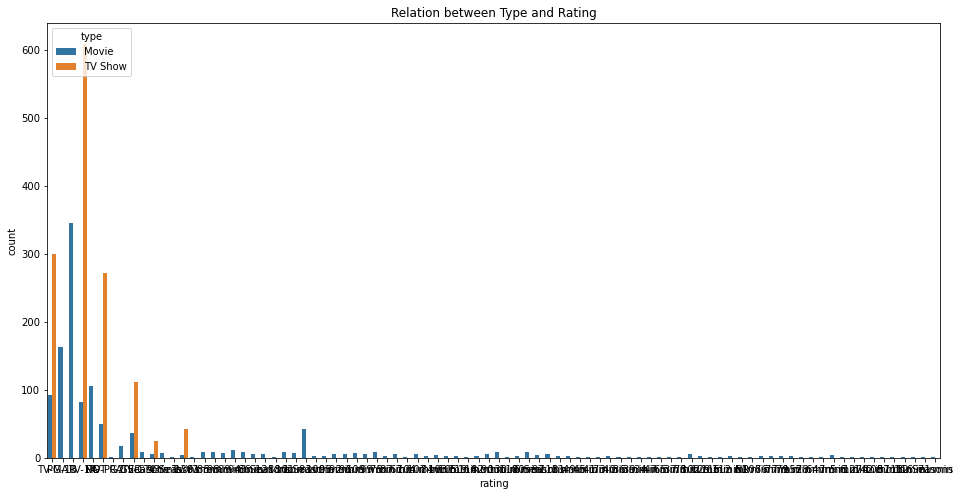

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(x='rating',hue='type',data=hulu)
plt.title('Relation between Type and Rating')
plt.show()

# Pie-chart for the Type: Movie and TV Shows

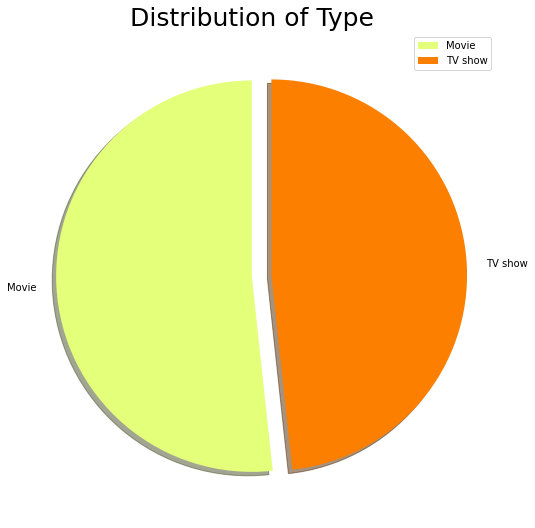

In [20]:
labels = ['Movie', 'TV show']
size = hulu['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

# Pie-chart for Rating

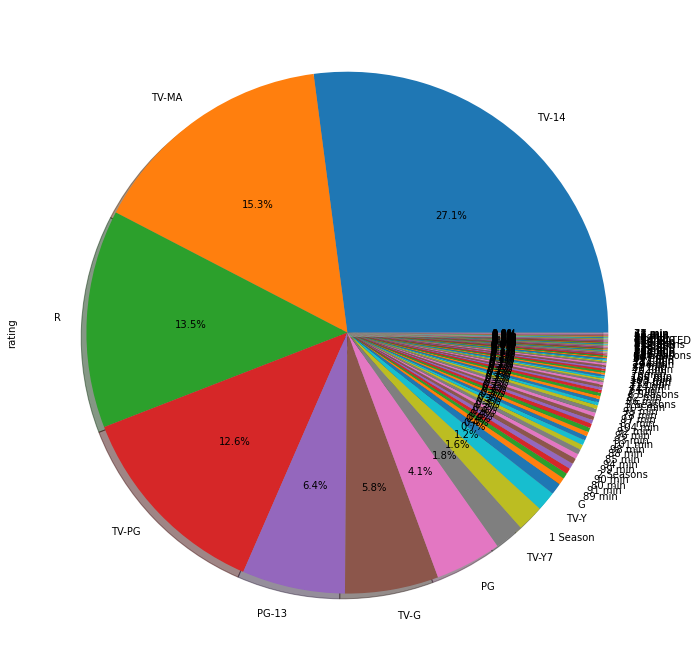

In [22]:
hulu['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(19,12))
plt.show()



# Wordcloud

In [25]:
from wordcloud import WordCloud

# Country

TypeError: sequence item 0: expected str instance, float found

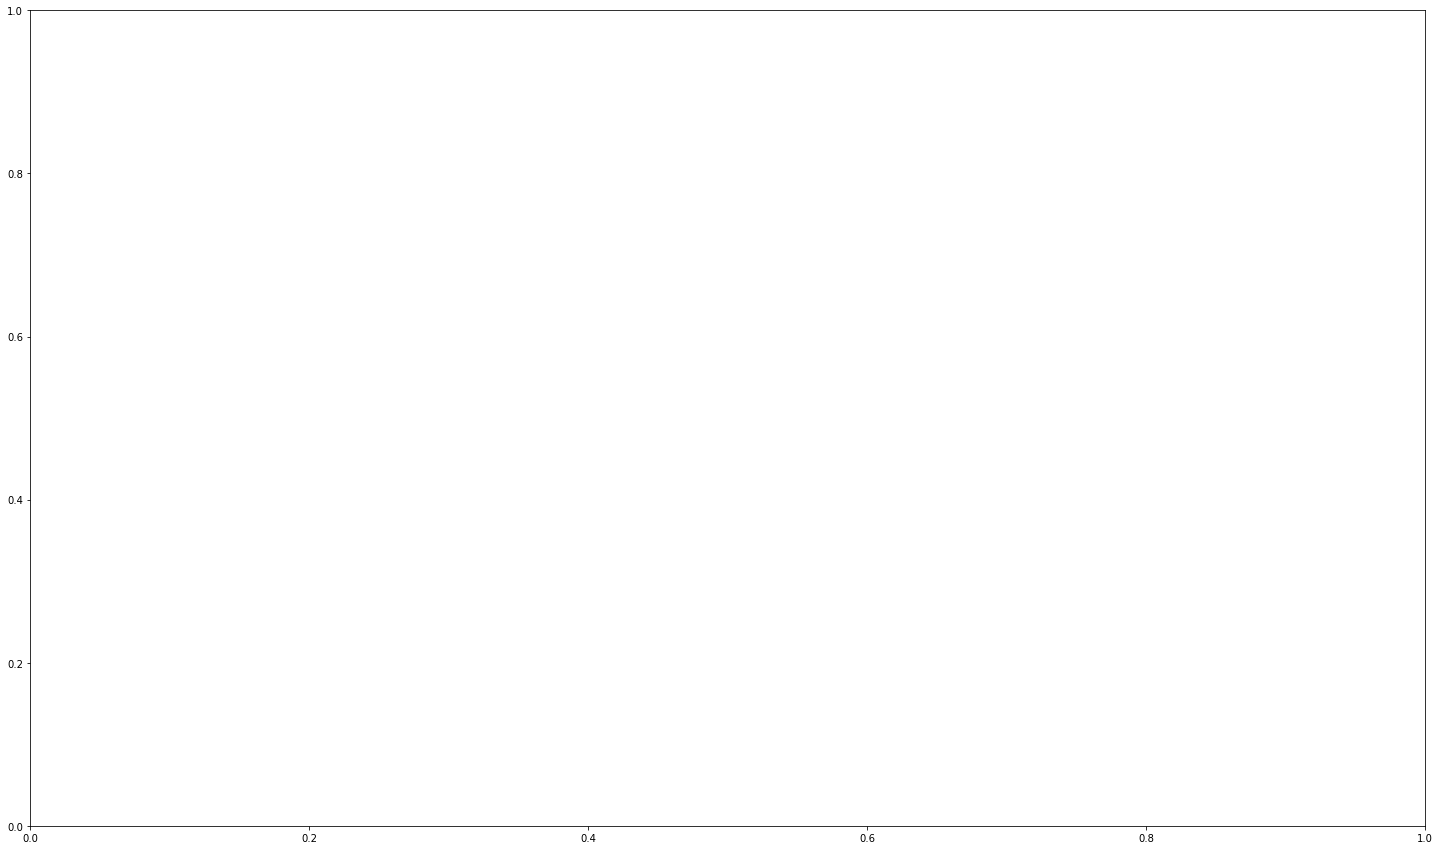

In [34]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

# Cast in the Show

TypeError: sequence item 0: expected str instance, float found

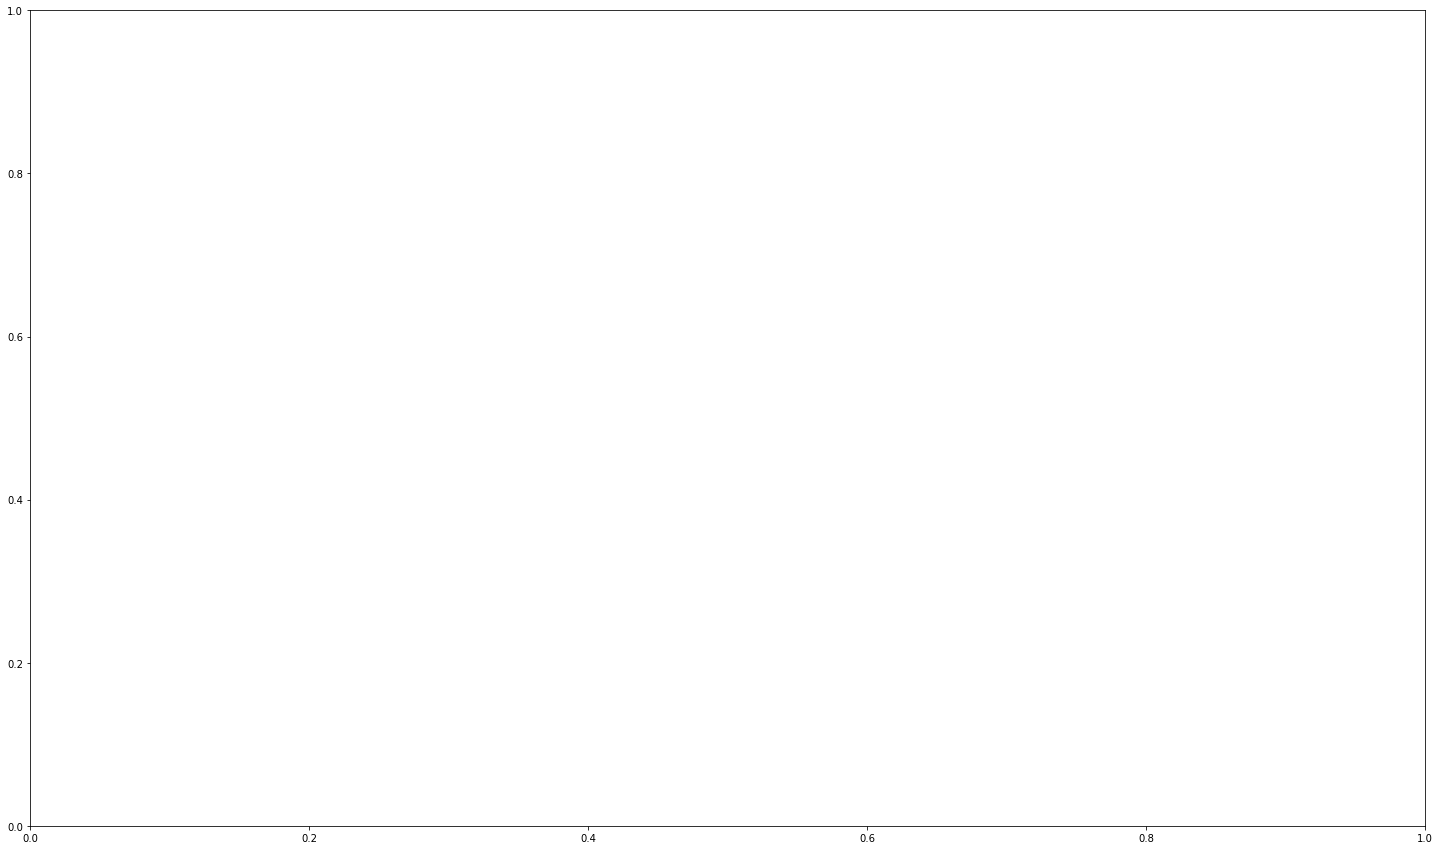

In [32]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

# Directors

# Categories

# conclusion